# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
#Reading Training data

X_data_train = pd.read_csv('Data/weather_data_train.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
X_data_train_labels = pd.read_csv('Data/weather_data_train_labels.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)

# X_data_train.head()

In [4]:
#Merging both labels and training data
result = pd.merge(X_data_train, X_data_train_labels, on='datetime', how='left')
# list(result.columns)

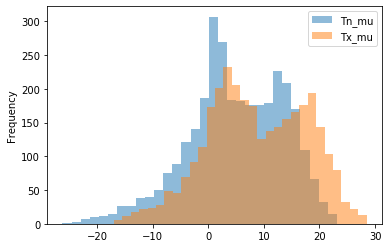

In [5]:
#Plotting histogram of min and max temperature

result['Tn_mu'].plot.hist(bins=30, alpha=0.5, label="Tn_mu")
result['Tx_mu'].plot.hist(bins=30, alpha=0.5, label="Tx_mu")
plt.legend(loc="upper right")

In [ ]:
#Pair-plot of various features according to demand of assignment

pair_plot = sns.pairplot(result, vars=["T_mu", "P_mu", "Td_mu", "Ff_mu", "VV_mu", "U_mu"], hue="OBSERVED")

In [7]:
features = ['T_mu','Po_mu','P_mu','Ff_mu','Tn_mu','Tx_mu','VV_mu','Td_mu','T_var','Po_var','P_var','Ff_var','Tn_var','Tx_var','VV_var','Td_var']
new_result = result[features]

#new_result.head()

In [12]:
corr = result.corr()
# print(corr)

## Standardizing data here

In [45]:
#Standardizing dataframe
Standardized_X_train = StandardScaler().fit_transform(new_result)
# print(type(Standardized_X_train))

<class 'numpy.ndarray'>


## Applying PCA on standardized data

Variance Explained by first component 0.2685061010242351
Variance Explained by second component 0.1986156510823528
Variance Explained by third component 0.14915815260866805


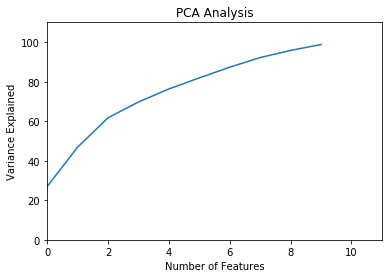

In [34]:
#Applying PCA

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(Standardized_X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4',' PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'])


import numpy as np
# pca.fit(new_result)
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(0,110)
plt.xlim(0,11)
# plt.style.context('seaborn-whitegrid')

print('Variance Explained by first component', variance[0])
print('Variance Explained by second component', variance[1])
print('Variance Explained by third component', variance[2])
plt.plot(var)

## Training LR with PCA

In [48]:
Y_train = X_data_train_labels[['U_mu']]

X_data_test = pd.read_csv('Data/weather_data_test.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
X_test = X_data_test[features]

Standardized_X_test = StandardScaler().fit_transform(X_test)
principalComponents1 = pca.transform(Standardized_X_test)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4',' PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'])

Y_data_test = pd.read_csv('Data/weather_data_test_labels.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
Y_test = Y_data_test[['U_mu']]


In [49]:
regr = linear_model.LinearRegression()
regr.fit(principalDf, Y_train)

Y_pred = regr.predict(principalDf1)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [[ 1.49806682  1.23222783 -3.58548745 -1.85127859  4.11193891 -3.34206393
   1.2727119   3.41580064 -0.46827639  0.8174258 ]]
Mean squared error: 66.92
Variance score: 0.59


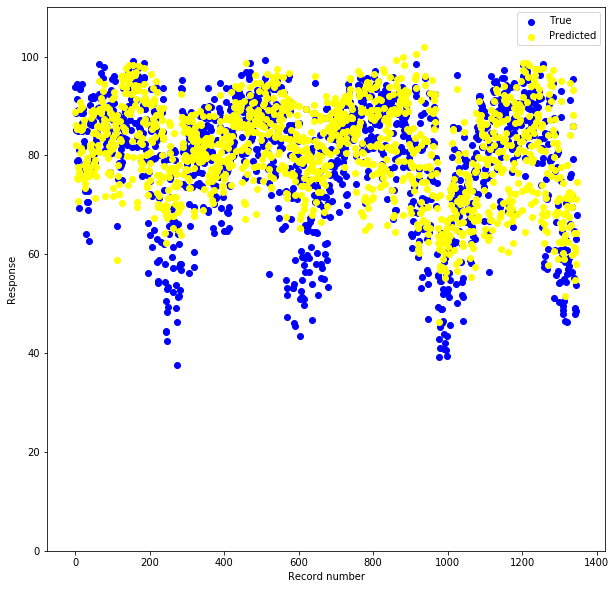

In [50]:
xx = list(range(1,1347))
plt.subplots(figsize =(10, 10))
plt.scatter(xx, Y_test,  color='blue', label='True')
plt.scatter(xx,Y_pred, color='yellow', label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Record number')
plt.ylabel('Response')

# plt.xlim(-10, 1500)
plt.ylim(0,110)
plt.show()

## Training LR without PCA

In [51]:
regr = linear_model.LinearRegression()
regr.fit(Standardized_X_train, Y_train)

Y_pred = regr.predict(Standardized_X_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [[-3.76284733e+01  8.16675788e+00 -8.41055139e+00 -2.53631727e-01
   2.39034041e+00 -3.00977805e+00 -7.67203873e-01  3.68106919e+01
   2.94467131e-01  1.16201822e+00 -1.12019198e+00 -3.31951016e-02
   3.10722638e-01 -5.14411816e-02  8.83555804e-02  2.09863754e-01]]
Mean squared error: 5.93
Variance score: 0.96


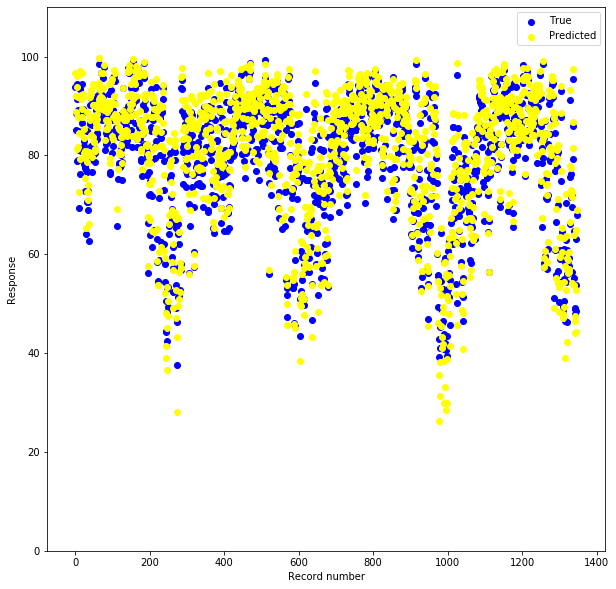

In [52]:
xx = list(range(1,1347))
plt.subplots(figsize =(10, 10))
plt.scatter(xx, Y_test,  color='blue', label='True')
plt.scatter(xx,Y_pred, color='yellow', label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Record number')
plt.ylabel('Response')

# plt.xlim(-10, 1500)
plt.ylim(0,110)
plt.show()

In [ ]:
#Reading training data-set

observed = pd.read_csv('Data/weather_data_train_labels.csv', sep=';', decimal=',', infer_datetime_format=True)
observed.head(3)
finalDf = principalDf.join(observed)
finalDf.head()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.scatter(finalDf['principal component 1'], finalDf['U_mu'])
plt.scatter(finalDf['principal component 2'], finalDf['U_mu'], c='r')
plt.show()

In [ ]:
# for rows in finalDf.iterrows():
#     if (rows[1][3] == 0):
#         plt.scatter(rows[1][0],rows[1][1],color='r')
# plt.show()

In [ ]:
# for rows in finalDf.iterrows():
#     if (rows[1][3] == 1):
#         plt.scatter(rows[1][0],rows[1][1],color='b')
# plt.show()

In [ ]:
xx = list(range(30,100))
X_test.head()
plt.subplots(figsize =(9, 9))
plt.scatter(Y_test, Y_pred,label='Predicted')
plt.plot(xx,xx,c='y', label='True')
# plt.scatter(xx,Y_pred, color='yellow', label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('True response')
plt.ylabel('Predicted response')

In [ ]:
plt.scatter()

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
model_pred = lin_reg.predict(X_test)
print(r2_score(Y_test, model_pred))

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y_train)
X_test_1 = poly_reg.fit_transform(X_test)
y_pred = lin_reg_2.predict(X_test_1)
print(r2_score(Y_test, y_pred))

In [ ]:
# X_train = new_result
Y_train = X_data_train_labels[['OBSERVED']]

# X_data_test = pd.read_csv('Data/weather_data_test.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
# X_test = X_data_test[features]

# Y_data_test = pd.read_csv('Data/weather_data_test_labels.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
Y_test = Y_data_test[['OBSERVED']]


In [ ]:
Y_train = Y_train.to_numpy()
Y_train = Y_train.reshape(3140,)
Y_test = Y_test.to_numpy()
Y_test = Y_test.reshape(1346,)
X_train = X_train.to_numpy()
X_train = X_train.reshape(3140,16)
X_test = X_test.to_numpy()
X_test = X_test.reshape(1346,16)

In [ ]:
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)

SVC_model.fit(X_train, Y_train)
KNN_model.fit(X_train, Y_train)

SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

print(accuracy_score(SVC_prediction, Y_test))
print(accuracy_score(KNN_prediction, Y_test))

print(confusion_matrix(SVC_prediction, Y_test))
print(classification_report(KNN_prediction, Y_test))

In [ ]:
for k in range(1,13):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train, Y_train)
    KNN_prediction = KNN_model.predict(X_test)
    print(k)
    print(accuracy_score(KNN_prediction, Y_test))
    print(classification_report(KNN_prediction, Y_test))

In [ ]:
array = confusion_matrix(Y_test, KNN_prediction)

df_cm = pd.DataFrame(array, index = [i for i in ["not dry","dry"]],
                  columns = [i for i in ["not dry","dry"]])

sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")

print("Confusion Matrix:")
print(array)

In [ ]:
print(new_result.columns)
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
new_features = ['VV_mu', 'T_mu','Td_mu']

X_data_train = pd.read_csv('Data/weather_data_train.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
X_data_train_labels = pd.read_csv('Data/weather_data_train_labels.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)

X_train = new_result[new_features]
Y_train = X_data_train_labels[['U_mu']]

X_data_test_new = pd.read_csv('Data/weather_data_test.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
X_test = X_data_test_new[new_features]

Y_data_test = pd.read_csv('Data/weather_data_test_labels.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
Y_test = Y_data_test[['U_mu']]

regr = linear_model.LinearRegression()

# new_result1.head()
# x = new_result.loc[:, features].values
# X_train = StandardScaler().fit_transform(X_train)
# X_test =  StandardScaler().fit_transform(X_test)

# Train the model using the training sets
regr.fit(X_train, Y_train)

Y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

X_test.head()

In [ ]:
xx = list(range(30,100))
X_test.head()
plt.subplots(figsize =(9, 9))
plt.scatter(Y_test, Y_pred,label='Predicted')
plt.plot(xx,xx,c='y', label='True')
# plt.scatter(xx,Y_pred, color='yellow', label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('True response')
plt.ylabel('Predicted response')

# # plt.xlim(-10, 1500)
# plt.ylim(0,110)
# plt.show()

In [ ]:
X_train.head()

In [ ]:
# new_features = ['VV_mu', 'T_mu','Td_mu']

new_result1 = new_result[new_features]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(new_result1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

# pca.explained_variance_ratio_
pca.explained_variance_ratio_

In [ ]:
new_result1.head()
# x = new_result.loc[:, features].values
x = StandardScaler().fit_transform(new_result1)

#AFTER STANDARDIZATION

# from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
print(X_train)

In [ ]:
# X_train = new_result
Y_train = X_data_train_labels[['OBSERVED']]

# X_data_test = pd.read_csv('Data/weather_data_test.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
# X_test = X_data_test[features]

# Y_data_test = pd.read_csv('Data/weather_data_test_labels.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
Y_test = Y_data_test[['OBSERVED']]

Y_train = Y_train.to_numpy()
Y_train = Y_train.reshape(3140,)
Y_test = Y_test.to_numpy()
Y_test = Y_test.reshape(1346,)
X_train = X_train.to_numpy()
X_train = X_train.reshape(3140,3)
X_test = X_test.to_numpy()
X_test = X_test.reshape(1346,3)

In [ ]:
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)

SVC_model.fit(X_train, Y_train)
KNN_model.fit(X_train, Y_train)

SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

print(accuracy_score(SVC_prediction, Y_test))
print(accuracy_score(KNN_prediction, Y_test))

print(confusion_matrix(SVC_prediction, Y_test))
print(classification_report(KNN_prediction, Y_test))

for k in range(1,10):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train, Y_train)
    KNN_prediction = KNN_model.predict(X_test)
    print(k)
    print(accuracy_score(KNN_prediction, Y_test))
    print(classification_report(KNN_prediction, Y_test))

In [ ]:
from sklearn.metrics import confusion_matrix